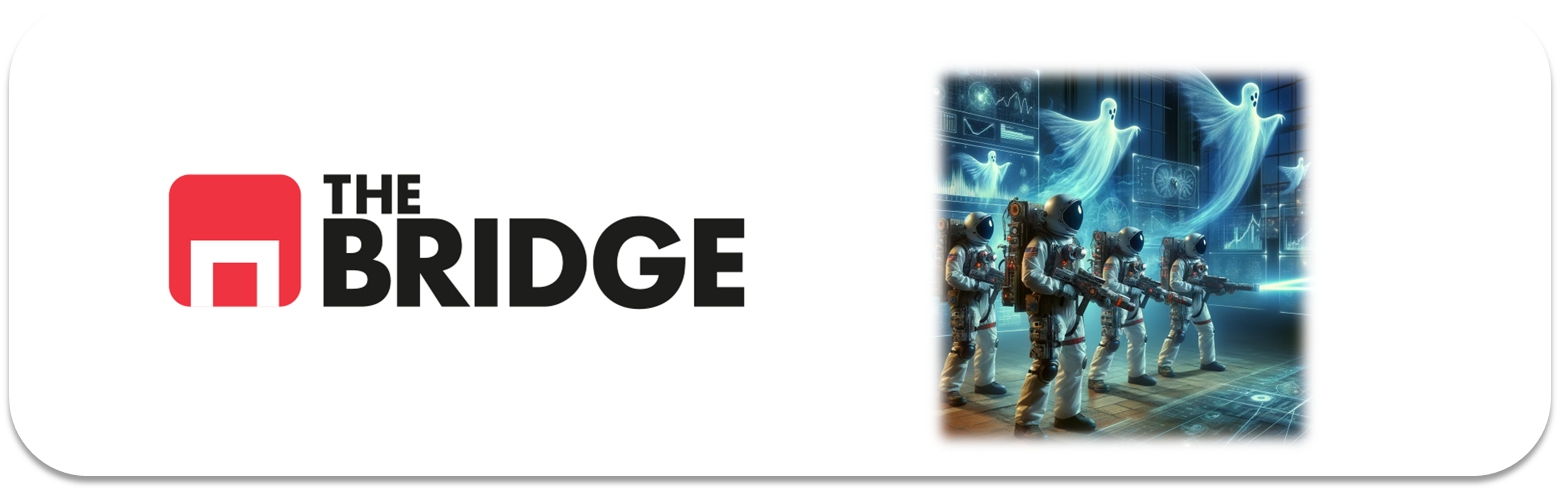

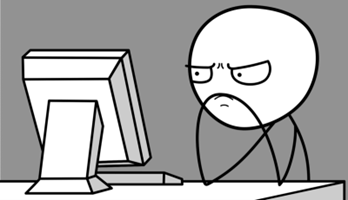

Para ejercitarte y afianzar lo aprendido sobre **Series Temporales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### El "problema"

Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

### Ejercicio 1

Carga los datos y adecúa el dataset teniendo en cuenta que es una serie temporal. Para ello convierte la columna de fecha al formato adecuado y luego úsala como índice.

In [4]:
df = pd.read_csv(
    "/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/DS_Online_Octubre24_Exercises/04_Machine_Learning/Sprint_15/Unidad_01/Ejercicios_Workout/data/AirPassengers.csv"
)

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [8]:
df["Passengers"] = df["value"]
df.head()

,value,Passengers
date,,
1949-01-01,112,112
1949-02-01,118,118
1949-03-01,132,132
1949-04-01,129,129
1949-05-01,121,121


### Ejercicio 2

¿De qué fecha a qué fecha va el histórico?¿Qué periodicidad tiene la serie?

In [5]:
# Obtener la fecha mínima y máxima
fecha_min = df.index.min()
fecha_max = df.index.max()

# Determinar la periodicidad
diferencias_fechas = df.index.to_series().diff().dropna()
periodicidad = diferencias_fechas.value_counts().idxmax()

# Mostrar resultados
fecha_min, fecha_max, periodicidad

(Timestamp('1949-01-01 00:00:00'),
 Timestamp('1960-12-01 00:00:00'),
 Timedelta('31 days 00:00:00'))

### Ejercicio 3

¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad? Analiza de manera gráfica, pero todavía sin descomponer la serie.

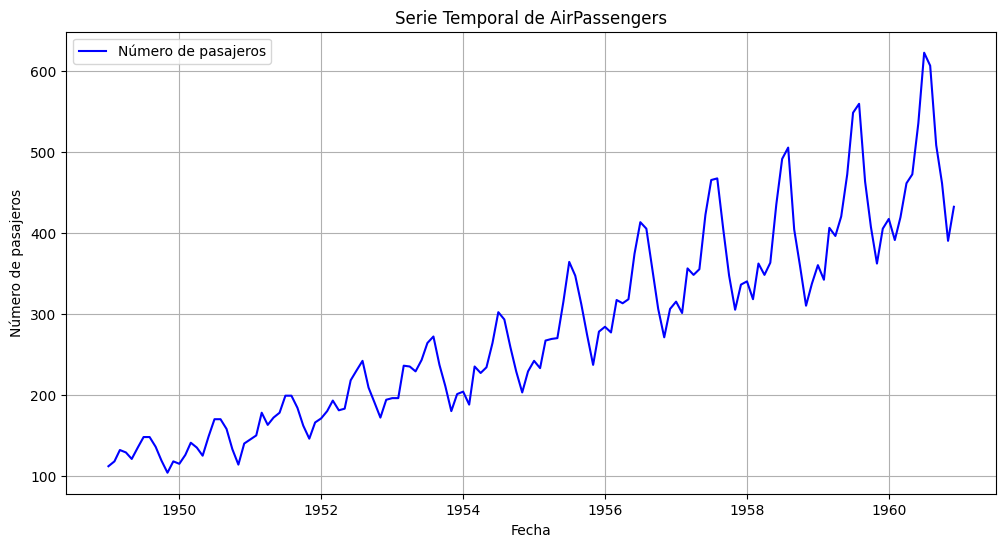

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['value'], label="Número de pasajeros", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Serie Temporal de AirPassengers")
plt.legend()
plt.grid()


plt.show()


✅ Tendencia: Se observa una tendencia creciente en el número de pasajeros a lo largo del tiempo.

✅ Estacionalidad: Hay patrones repetitivos, con picos y valles en intervalos regulares, lo que sugiere una fuerte estacionalidad.

❌ No es estacionaria: Dado que la media y la varianza parecen cambiar con el tiempo, la serie no es estacionaria.

### Ejercicio 4

¿Podrías demostrar de dos maneras estadísticas que la serie no es estacionaria?

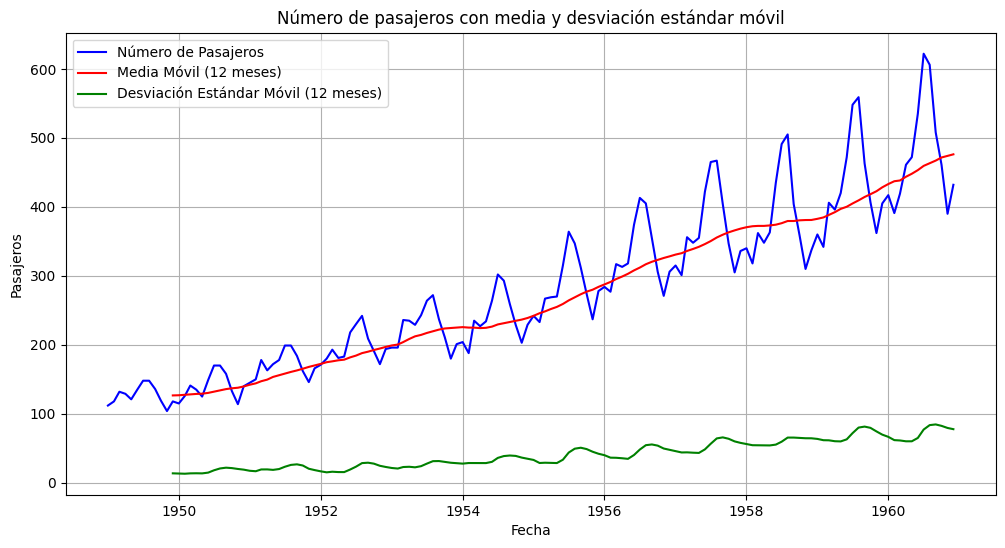

(0.8153688792060447, 0.9918802434376409)

In [9]:
# Prueba de Dickey-Fuller aumentada (ADF Test)
adf_test = adfuller(df['Passengers'])

# Extraer resultados
adf_statistic = adf_test[0]
p_value = adf_test[1]

# Visualización de la media y la varianza en ventanas móviles
df['Rolling Mean'] = df['Passengers'].rolling(window=12).mean()
df['Rolling Std'] = df['Passengers'].rolling(window=12).std()

# Graficar la serie con media y desviación estándar
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label="Número de Pasajeros", color='blue')
plt.plot(df['Rolling Mean'], label="Media Móvil (12 meses)", color='red')
plt.plot(df['Rolling Std'], label="Desviación Estándar Móvil (12 meses)", color='green')
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.title("Número de pasajeros con media y desviación estándar móvil")
plt.legend()
plt.grid(True)
plt.show()

# Resultados del test ADF
adf_statistic, p_value


📊 Resultados del análisis de estacionariedad

1️⃣ Prueba de Dickey-Fuller aumentada (ADF Test)

Estadístico ADF: 0.815
p-valor: 0.991
🔴 Conclusión: La hipótesis nula del test ADF indica que la serie tiene raíz unitaria (no es estacionaria). Como el p-valor es mucho mayor que 0.05, no podemos rechazar la hipótesis nula.

2️⃣ Análisis gráfico

La media móvil y la desviación estándar aumentan con el tiempo, lo que refuerza la conclusión de que la serie no es estacionaria.
Si la serie fuera estacionaria, la media y la varianza deberían ser constantes a lo largo del tiempo.
✅ Confirmamos que la serie NO es estacionaria

### Ejercicio 5

Emplea la descomposición que hemos aprendido en el workout para representar gráficamente la tendencia. Si has mostrado gráficamente la tendencia en el ejercicio 3, compara ambos.

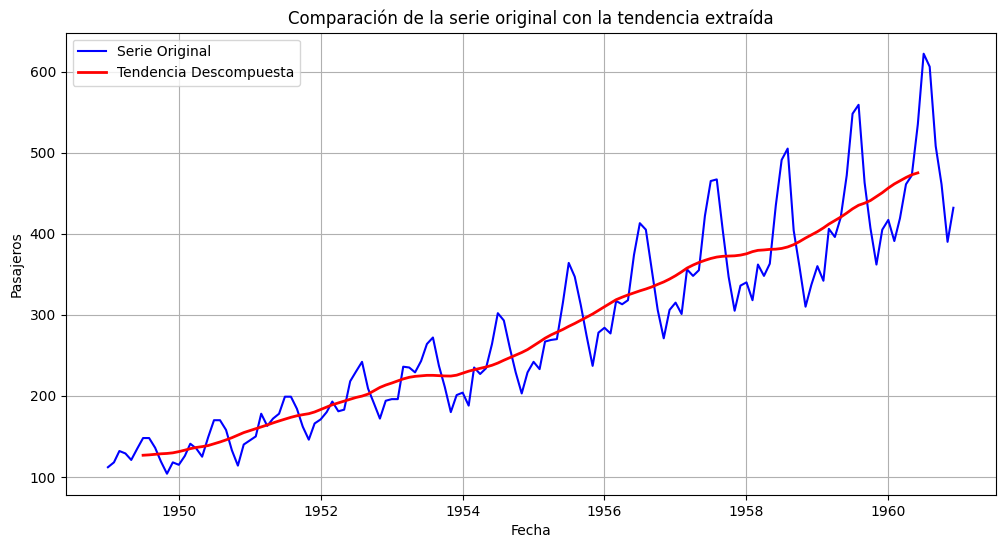

In [10]:
# Descomposición de la serie usando un modelo aditivo
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

# Extraer la tendencia
trend = decomposition.trend

# Graficar la tendencia descompuesta y compararla con el gráfico original
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label="Serie Original", color='blue')
plt.plot(df.index, trend, label="Tendencia Descompuesta", color='red', linewidth=2)
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.title("Comparación de la serie original con la tendencia extraída")
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 6

Visualiza todos los componentes de la serie temporal por separado

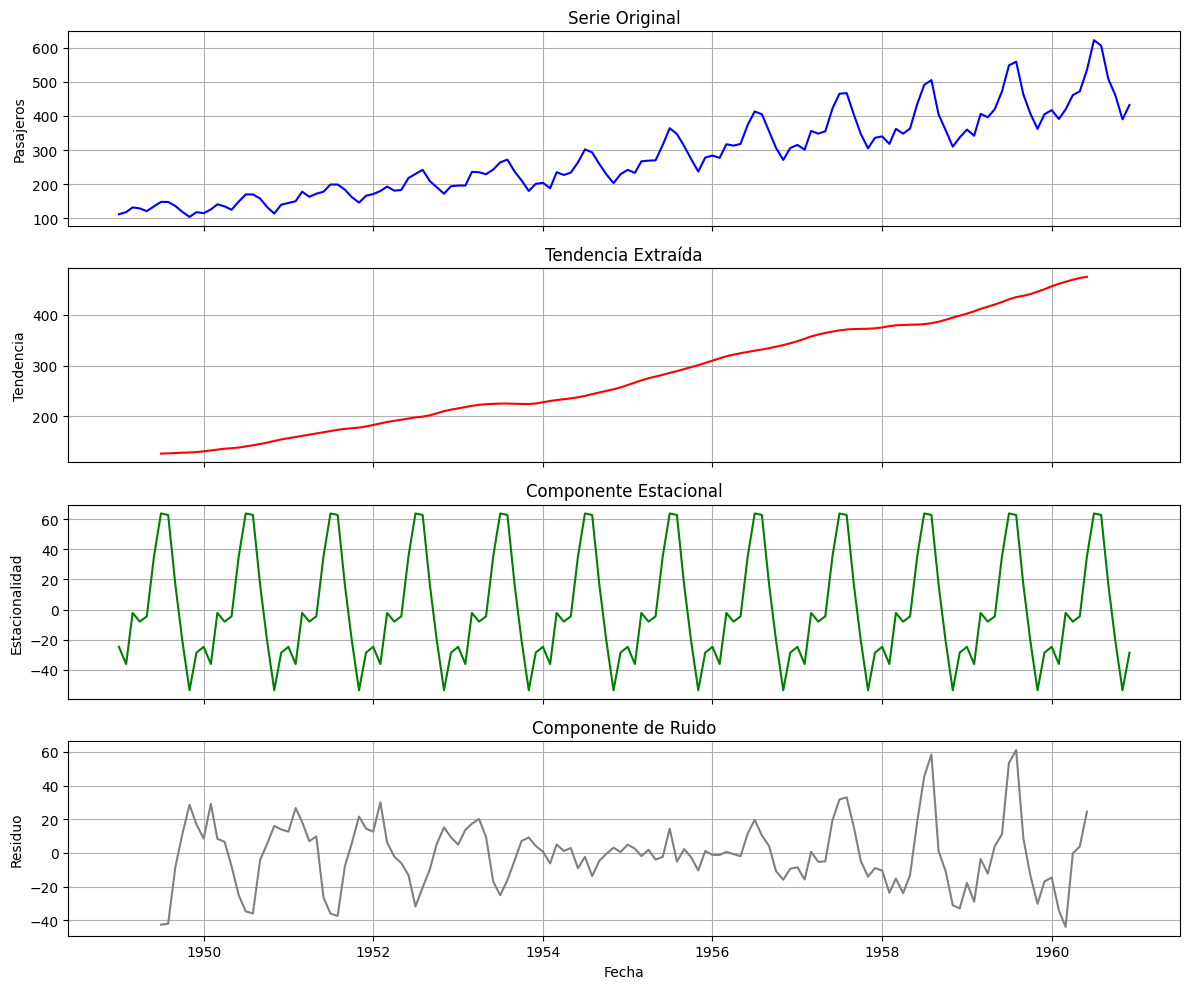

In [11]:
# Graficar la descomposición completa
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Serie original
axes[0].plot(df.index, df['Passengers'], label="Serie Original", color='blue')
axes[0].set_ylabel("Pasajeros")
axes[0].set_title("Serie Original")
axes[0].grid(True)

# Tendencia
axes[1].plot(df.index, decomposition.trend, label="Tendencia", color='red')
axes[1].set_ylabel("Tendencia")
axes[1].set_title("Tendencia Extraída")
axes[1].grid(True)

# Estacionalidad
axes[2].plot(df.index, decomposition.seasonal, label="Estacionalidad", color='green')
axes[2].set_ylabel("Estacionalidad")
axes[2].set_title("Componente Estacional")
axes[2].grid(True)

# Residuo
axes[3].plot(df.index, decomposition.resid, label="Residuo", color='gray')
axes[3].set_ylabel("Residuo")
axes[3].set_title("Componente de Ruido")
axes[3].grid(True)

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()

### Ejercicio 7

Crea una matriz de correlación con los últimos 24 instantes (matriz de autocorrelación). Crea un dataframe con shift de 1 a 24 para ello, la idea es que puedas hacer una matriz de correlación con el valor actual y los 24 valores anteriores. Es decir de un mes con sus 23 meses anteriores. Interpreta la estacionalidad

In [12]:
# Crear un dataframe con valores desplazados de 1 a 24 meses
lags = 24
df_lags = pd.concat([df['Passengers'].shift(i) for i in range(lags+1)], axis=1)
df_lags.columns = [f"Lag_{i}" for i in range(lags+1)]
df_lags = df_lags.dropna()  # Eliminar valores nulos

# Calcular la matriz de correlación
correlation_matrix = df_lags.corr()

correlation_matrix


,Lag_0,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,...,Lag_15,Lag_16,Lag_17,Lag_18,Lag_19,Lag_20,Lag_21,Lag_22,Lag_23,Lag_24
Lag_0,1.000000,0.945286,0.859034,0.782863,0.732078,0.717699,0.716014,0.720387,0.734591,0.783479,...,0.787145,0.742718,0.730165,0.724982,0.724741,0.735195,0.783646,0.853889,0.935593,0.983254
Lag_1,0.945286,1.000000,0.946483,0.860237,0.784254,0.737563,0.725251,0.719317,0.722754,0.736411,...,0.858458,0.788578,0.749023,0.736248,0.727256,0.726328,0.736188,0.784425,0.855123,0.936016
Lag_2,0.859034,0.946483,1.000000,0.948734,0.864918,0.797266,0.753173,0.734201,0.725864,0.728315,...,0.942345,0.863269,0.802545,0.762346,0.743485,0.732419,0.730063,0.739962,0.787172,0.857340
Lag_3,0.782863,0.860237,0.948734,1.000000,0.949026,0.869280,0.802088,0.753416,0.734405,0.725705,...,0.989453,0.942644,0.868212,0.805827,0.761892,0.743153,0.732019,0.729101,0.742059,0.788181
Lag_4,0.732078,0.784254,0.864918,0.949026,1.000000,0.951085,0.870142,0.798447,0.750350,0.731321,...,0.944208,0.989286,0.944998,0.867774,0.802130,0.759074,0.741126,0.728909,0.731338,0.742572
Lag_5,0.717699,0.737563,0.797266,0.869280,0.951085,1.000000,0.948250,0.865047,0.795767,0.747084,...,0.869928,0.945873,0.988672,0.941737,0.863647,0.800634,0.759102,0.738588,0.736641,0.735589
Lag_6,0.716014,0.725251,0.753173,0.802088,0.870142,0.948250,1.000000,0.947694,0.866272,0.795442,...,0.807051,0.870502,0.942423,0.988063,0.942129,0.866149,0.804017,0.758617,0.749445,0.743406
Lag_7,0.720387,0.719317,0.734201,0.753416,0.798447,0.865047,0.947694,1.000000,0.947845,0.865348,...,0.759641,0.803318,0.865444,0.940771,0.987766,0.942745,0.866908,0.802218,0.763931,0.752019
Lag_8,0.734591,0.722754,0.725864,0.734405,0.750350,0.795767,0.866272,0.947845,1.000000,0.947455,...,0.744746,0.756511,0.801017,0.865307,0.940077,0.987574,0.942494,0.865525,0.805074,0.765279
Lag_9,0.783479,0.736411,0.728315,0.725705,0.731321,0.747084,0.795442,0.865348,0.947455,1.000000,...,0.740942,0.741665,0.753637,0.799722,0.863794,0.939599,0.987618,0.941868,0.867923,0.806107


### Ejercicio 8
Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

<Figure size 1200x600 with 0 Axes>

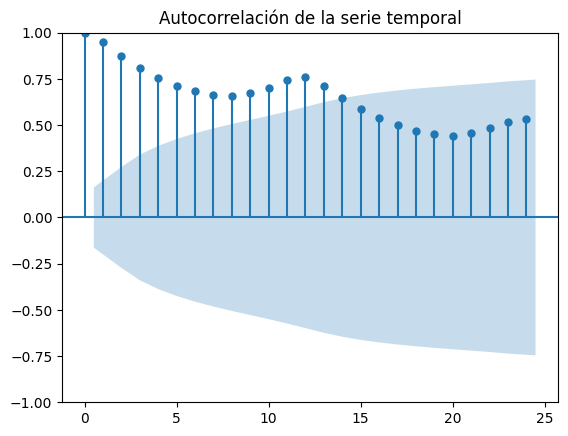

In [13]:
# Graficar el correlograma (ACF) para detectar la periodicidad
plt.figure(figsize=(12, 6))
plot_acf(df['Passengers'], lags=24)
plt.title("Autocorrelación de la serie temporal")
plt.show()


En el gráfico de Autocorrelación (ACF) se observa que hay picos significativos en los retrasos de 12, 24 meses, etc.

Esto confirma que la serie tiene una estacionalidad clara de 12 meses, lo que significa que los patrones en el número de pasajeros se repiten cada año.

### Ejercicio 9

 Divide en train y test. En este caso no haremos división en validación, entre otras razones por la cantidad de datos que tenemos. Guarda 20 muestras para test.

In [14]:
# Reservamos los últimos 20 valores para test
train_size = len(df) - 20
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Mostrar tamaños de los conjuntos
len(train), len(test)


(124, 20)

### Ejercicio 10

Pon en práctica lo visto en clases, crea un modelo de ARIMA (puedes utilizar autoarima), mide su RMSE y su MAPE. Comparalo gráficamente con los valores reales.

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homeb

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1180.340, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1174.338, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1171.576, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1179.124, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1164.464, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homeb

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1171.757, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1163.079, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1170.015, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1172.799, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1156.122, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1170.365, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1157.085, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1158.312, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1159.679, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1170.299, Time=0.01 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1151.726, Time=0.03 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1147.415, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1156.709, Time=0.03 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1149.384, Time=0.04 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1157.578, Time=0.07 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=1144.103, Time=0.09 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(5,1,3)(0,0,0)[0]          
Total fit time: 1.080 seconds


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


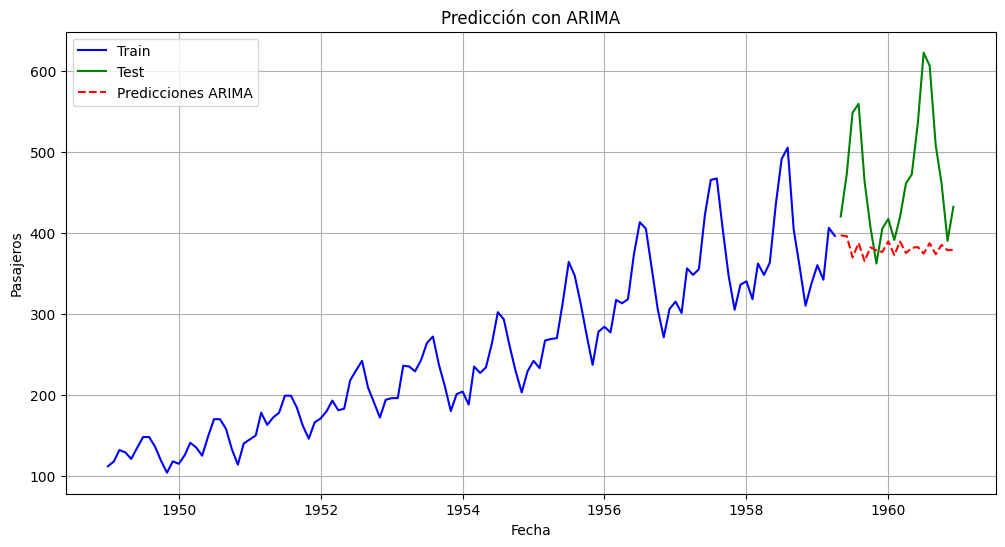

(113.15693953098905, 0.17150802198353673)

In [16]:
# Ajustar un modelo ARIMA automáticamente
arima_model = auto_arima(train['Passengers'], seasonal=False, trace=True, suppress_warnings=True, stepwise=True)

# Realizar predicciones en el conjunto de test
arima_forecast = arima_model.predict(n_periods=len(test))

# Evaluar el modelo con RMSE y MAPE
rmse_arima = mean_squared_error(test['Passengers'], arima_forecast) **0.5
mape_arima = mean_absolute_percentage_error(test['Passengers'], arima_forecast)

# Graficar predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label="Train", color='blue')
plt.plot(test.index, test['Passengers'], label="Test", color='green')
plt.plot(test.index, arima_forecast, label="Predicciones ARIMA", color='red', linestyle='dashed')
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.title("Predicción con ARIMA")
plt.legend()
plt.grid(True)
plt.show()

rmse_arima, mape_arima


### Ejercicio 11

Haz lo mismo que en el ejercicio 10 pero con un modelo SARIMA. ¿Cuál es mejor y por qué?

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homeb

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=843.411, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=942.581, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=841.692, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=890.316, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1100.615, Time=0.01 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=841.349, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=841.921, Time=0.08 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=841.844, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=842.275, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=889.425, Time=0.02 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=842.600, Time=0.10 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,0)[12]             : AIC=849.916, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 1.242 seconds


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


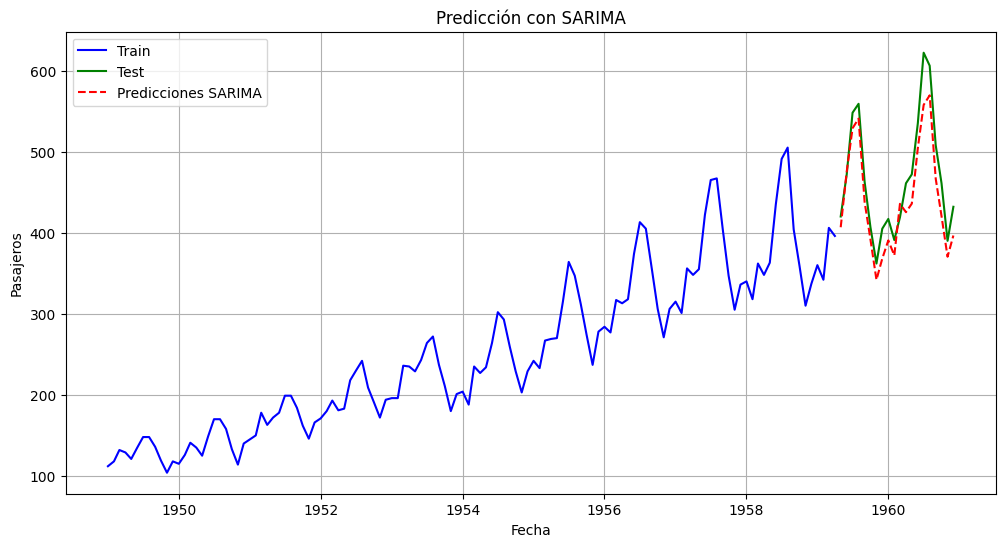

(30.673686010026632, 0.05860023587172246)

In [17]:
# Ajustar un modelo SARIMA automáticamente con estacionalidad
sarima_model = auto_arima(train['Passengers'], seasonal=True, m=12, trace=True, suppress_warnings=True, stepwise=True)

# Realizar predicciones en el conjunto de test
sarima_forecast = sarima_model.predict(n_periods=len(test))

# Evaluar el modelo con RMSE y MAPE
rmse_sarima = mean_squared_error(test['Passengers'], sarima_forecast) ** 0.5  # Raíz cuadrada manual
mape_sarima = mean_absolute_percentage_error(test['Passengers'], sarima_forecast)

# Graficar predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label="Train", color='blue')
plt.plot(test.index, test['Passengers'], label="Test", color='green')
plt.plot(test.index, sarima_forecast, label="Predicciones SARIMA", color='red', linestyle='dashed')
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.title("Predicción con SARIMA")
plt.legend()
plt.grid(True)
plt.show()

rmse_sarima, mape_sarima
